In [1]:
import wget
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd

%matplotlib inline

In [2]:
url_data = "http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip"
url_dict = "http://187.191.75.115/gobmx/salud/datos_abiertos/diccionario_datos_covid19.zip"
curr_dir = os.getcwd()
file_data = "datos_abiertos_covid19.zip"

if "diccionario_datos_covid19.zip" not in os.listdir():
    wget.download(url_dict, os.path.join(curr_dir, "diccionario_datos_covid19.zip" ))

# elimina archivos previos
for file in os.listdir():
    if ".csv" in file or file == file_data:
        os.remove(file)
# descarga 
wget.download(url_data, os.path.join(curr_dir,file_data))

# descompresión
with ZipFile(file_data, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
200418COVID19MEXICO.csv                        2020-04-18 17:58:20      6892325
Extracting all the files now...
Done!


In [3]:
# identifica el archivo con datos
for file in os.listdir():
    if ".csv" in file:
        name_file = file
print(name_file)
df = pd.read_csv(name_file, encoding = "latin-1")

200418COVID19MEXICO.csv


/home/jr2bg/.virtualenvs/cv4py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-18,2,9,15,1,15,15,37.0,2,2020-04-09,...,2,2,2,2,2,1,99,99,97,1
1,2020-04-18,2,12,9,1,15,9,3.0,1,2020-04-16,...,2,1,2,2,2,2,99,99,97,97
2,2020-04-18,2,9,28,2,16,28,32.0,1,2020-04-06,...,2,2,2,2,1,1,99,99,97,97
3,2020-04-18,2,12,9,2,99,9,13.0,1,2020-04-17,...,2,2,2,2,1,3,99,99,97,97
4,2020-04-18,1,3,15,2,15,15,106.0,1,2020-04-16,...,2,1,2,2,1,3,99,99,97,97


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49167 entries, 0 to 49166
Data columns (total 34 columns):
FECHA_ACTUALIZACION    49167 non-null object
ORIGEN                 49167 non-null int64
SECTOR                 49167 non-null int64
ENTIDAD_UM             49167 non-null int64
SEXO                   49167 non-null int64
ENTIDAD_NAC            49167 non-null int64
ENTIDAD_RES            49167 non-null int64
MUNICIPIO_RES          49158 non-null float64
TIPO_PACIENTE          49167 non-null int64
FECHA_INGRESO          49167 non-null object
FECHA_SINTOMAS         49167 non-null object
FECHA_DEF              49167 non-null object
INTUBADO               49167 non-null int64
NEUMONIA               49167 non-null int64
EDAD                   49167 non-null int64
NACIONALIDAD           49167 non-null int64
EMBARAZO               49167 non-null int64
HABLA_LENGUA_INDIG     49167 non-null int64
DIABETES               49167 non-null int64
EPOC                   49167 non-null int64
ASMA 

In [6]:
df["FECHA_SINTOMAS"] =pd.to_datetime(df["FECHA_SINTOMAS"], format = "%Y-%m-%d")
df["FECHA_INGRESO"] =pd.to_datetime(df["FECHA_INGRESO"], format = "%Y-%m-%d")
df["FECHA_ACTUALIZACION"] =pd.to_datetime(df["FECHA_ACTUALIZACION"], format = "%Y-%m-%d")

In [7]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO',
       'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [8]:
df["FECHA_DEF"].unique()

array(['9999-99-99', '2020-04-13', '2020-04-14', '2020-04-09',
       '2020-04-06', '2020-04-03', '2020-03-27', '2020-04-07',
       '2020-03-30', '2020-04-11', '2020-04-15', '2020-04-16',
       '2020-04-10', '2020-03-29', '2020-04-18', '2020-04-17',
       '2020-04-02', '2020-03-31', '2020-04-04', '2020-04-12',
       '2020-04-08', '2020-04-05', '2020-04-01', '2020-03-26',
       '2020-03-23', '2020-03-28', '2020-03-24', '2020-03-25',
       '2020-03-18', '2020-02-10', '2020-03-20', '2020-03-22',
       '2020-03-17', '2020-01-29', '2020-03-09'], dtype=object)

In [9]:
# necesario copiar el df con la info de los fallecidos para evitar fallas al 
# cambiar FECHA_DEF a datetime
# "9999-99-99" en "FECHA_DEF" significa que el paciente aún vive
# consideraremos los fallecidos por COVID
df_fallecidos = df[df["FECHA_DEF"] != "9999-99-99"].copy()
df_Nfallecidos = df[df["FECHA_DEF"] == "9999-99-99"]

df_fallecidos["FECHA_DEF"] = pd.to_datetime(df_fallecidos["FECHA_DEF"], format = "%Y-%m-%d")



In [16]:
df_fallecidos["FECHA_DEF"].unique()

array(['2020-04-13T00:00:00.000000000', '2020-03-26T00:00:00.000000000',
       '2020-04-09T00:00:00.000000000', '2020-03-28T00:00:00.000000000',
       '2020-04-15T00:00:00.000000000', '2020-04-11T00:00:00.000000000',
       '2020-04-10T00:00:00.000000000', '2020-04-14T00:00:00.000000000',
       '2020-04-02T00:00:00.000000000', '2020-03-30T00:00:00.000000000',
       '2020-04-08T00:00:00.000000000', '2020-04-05T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-04-01T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-02-10T00:00:00.000000000',
       '2020-04-12T00:00:00.000000000', '2020-04-07T00:00:00.000000000',
       '2020-04-04T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-04-06T00:00:00.000000000', '2020-03-25T00:00:00.000000000',
       '2020-03-29T00:00:00.000000000', '2020-03-24T00:00:00.000000000',
       '2020-03-27T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-17

In [17]:
df_fallecidos["DIAS_ENF"] = df_fallecidos["FECHA_DEF"] - df_fallecidos["FECHA_SINTOMAS"]

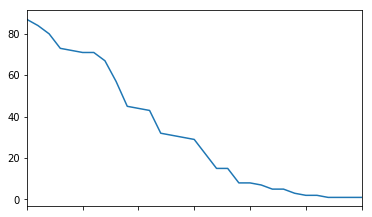

In [18]:
df_fallecidos["DIAS_ENF"].value_counts().plot()

In [19]:
df_fallecidos["DIAS_ENF"].describe()

count                      1012
mean     8 days 06:42:41.264822
std      5 days 09:08:39.931804
min             0 days 00:00:00
25%             4 days 00:00:00
50%             7 days 00:00:00
75%            11 days 00:00:00
max            34 days 00:00:00
Name: DIAS_ENF, dtype: object

La descripción de la columna anterior muestra que la mitad de los fallecidos mueren a los 7 días de percibir los síntomas.
El 75% de los fallecidos mueren después de los 11 días de los primeros síntomas.

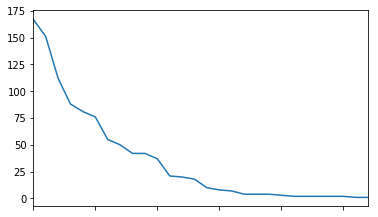

In [20]:
df_fallecidos["DIAS_HOSP"] = df_fallecidos["FECHA_DEF"] - df_fallecidos["FECHA_INGRESO"]
df_fallecidos["DIAS_HOSP"].value_counts().plot()

In [21]:
df_fallecidos["DIAS_HOSP"].value_counts().describe()

count     28.000000
mean      36.142857
std       46.594161
min        1.000000
25%        2.750000
50%       14.000000
75%       51.250000
max      167.000000
Name: DIAS_HOSP, dtype: float64

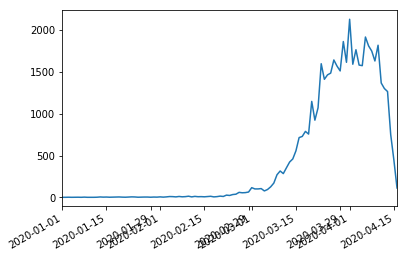

In [22]:
#%matplotlib inline
df["FECHA_SINTOMAS"].value_counts().plot()

In [23]:
df[df["FECHA_INGRESO"] == df["FECHA_SINTOMAS"]].shape

(6988, 34)

Hay ... casos que fueron ingresados a la unidad correspondiente el mismo día que presentaron los síntomas

In [24]:
# cuantos de los hospitalizados fallecieron
# mas el porcentaje
df["FECHA_INGRESO"].unique()

array(['2020-04-09T00:00:00.000000000', '2020-04-16T00:00:00.000000000',
       '2020-04-06T00:00:00.000000000', '2020-04-15T00:00:00.000000000',
       '2020-04-02T00:00:00.000000000', '2020-03-28T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-04-12T00:00:00.000000000',
       '2020-04-07T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
       '2020-03-25T00:00:00.000000000', '2020-04-08T00:00:00.000000000',
       '2020-03-06T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-04-04T00:00:00.000000000', '2020-03-30T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-03-26T00:00:00.000000000',
       '2020-03-31T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-24T00:00:00.000000000',
       '2020-04-13T00:00:00.000000000', '2020-04-11T00:00:00.000000000',
       '2020-03-27T00:00:00.000000000', '2020-03-23

In [25]:
df_fallecidos[df_fallecidos["RESULTADO"]== 2]

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DIAS_ENF,DIAS_HOSP
9,2020-04-16,1,12,12,1,12,12,56,2,2020-04-12,...,2,2,2,2,99,99,97,1,8 days,1 days
291,2020-04-16,2,4,14,1,14,14,97,2,2020-03-26,...,2,2,99,2,99,MÃ©xico,97,2,10 days,2 days
404,2020-04-16,2,12,15,2,15,15,99,2,2020-04-07,...,2,2,1,2,99,99,97,2,2 days,2 days
408,2020-04-16,2,5,28,2,28,28,34,2,2020-03-23,...,2,2,99,2,99,MÃ©xico,97,2,5 days,3 days
527,2020-04-16,2,4,24,1,24,24,39,2,2020-03-23,...,2,2,99,2,99,MÃ©xico,97,2,10 days,10 days
583,2020-04-16,1,4,15,2,99,15,25,2,2020-03-27,...,1,1,99,2,99,MÃ©xico,97,2,9 days,3 days
941,2020-04-16,1,4,26,2,26,26,30,2,2020-03-26,...,2,2,99,2,99,MÃ©xico,97,1,6 days,6 days
980,2020-04-16,1,4,15,1,15,15,118,2,2020-04-03,...,2,2,99,2,99,MÃ©xico,97,2,2 days,0 days
993,2020-04-16,2,12,26,2,26,26,30,1,2020-03-18,...,2,2,2,2,99,MÃ©xico,97,97,7 days,0 days
1228,2020-04-16,2,5,32,1,32,32,39,2,2020-02-10,...,2,2,99,2,99,MÃ©xico,97,2,2 days,0 days


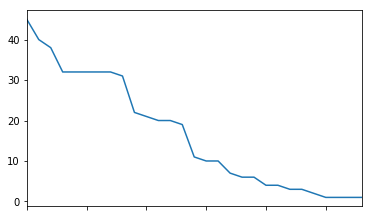

In [26]:
df_fallecidos_COVID = df_fallecidos[df_fallecidos["RESULTADO"] == 1].copy()
df_fallecidos_COVID["DIAS_ENF"].value_counts().plot()

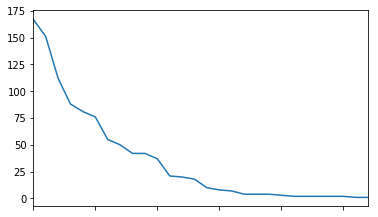

In [27]:
df_fallecidos["DIAS_HOSP"].value_counts().plot()

In [32]:
df_fallecidos_COVID[df_fallecidos_COVID["MUNICIPIO_RES"]==120]

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DIAS_ENF,DIAS_HOSP
26467,2020-04-16,1,4,15,1,15,15,120,2,2020-04-03,...,2,2,99,1,99,MÃ©xico,97,2,10 days,10 days
38424,2020-04-16,1,12,15,2,15,15,120,2,2020-04-09,...,1,1,2,1,99,99,97,2,7 days,5 days


In [35]:
df[df["RESULTADO"] == 1 & (df["MUNICIPIO_RES"]== 120)]

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
3050,2020-04-16,1,12,9,2,15,15,120,1,2020-04-02,...,2,2,2,2,2,1,99,MÃ©xico,97,97
4808,2020-04-16,2,12,14,1,14,14,120,1,2020-03-14,...,2,2,2,2,1,1,99,MÃ©xico,97,97
5786,2020-04-16,2,12,14,2,14,14,120,1,2020-03-16,...,2,2,2,1,1,1,99,MÃ©xico,97,97
5791,2020-04-16,2,12,14,1,14,14,120,1,2020-03-16,...,2,2,2,2,2,1,99,MÃ©xico,97,97
6025,2020-04-16,2,4,14,1,14,14,120,1,2020-04-07,...,2,2,2,2,99,1,99,MÃ©xico,97,97
6123,2020-04-16,2,12,14,2,23,14,120,1,2020-03-17,...,2,2,2,2,2,1,99,MÃ©xico,97,97
7100,2020-04-16,2,12,14,2,14,14,120,1,2020-03-30,...,2,2,2,2,1,1,99,MÃ©xico,97,97
7223,2020-04-16,2,9,14,2,14,14,120,1,2020-03-30,...,2,2,2,2,2,1,99,MÃ©xico,97,97
7675,2020-04-16,2,12,14,2,14,14,120,1,2020-03-16,...,2,2,2,2,2,1,99,MÃ©xico,97,97
8527,2020-04-16,2,4,14,2,15,14,120,1,2020-03-18,...,2,2,2,2,99,1,99,MÃ©xico,97,97
